In [1]:
 import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [95]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam_v2
from matplotlib.pyplot import get


num_classes = 10


fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

#fashion_model.summary()



# Generate data
## Format
train_X,train_Y,test_X,test_Y, valid_X, valid_Y 

In [96]:
import numpy as np
from tensorflow.keras.utils import  to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.datasets import fashion_mnist

def get_data():
    (train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
    train_X = train_X.reshape(-1, 28,28, 1)
    test_X = test_X.reshape(-1, 28,28, 1)

    # We want to force values to be in range [0,1]
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    train_X = train_X / 255.
    test_X = test_X / 255.

    # Change the labels from categorical to one-hot encoding
    train_Y_one_hot = to_categorical(train_Y)
    test_Y = to_categorical(test_Y)
    
    train_X, valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
    return train_X,train_Y,test_X,test_Y, valid_X, valid_Y



train_X,train_Y,test_X,test_Y, valid_X, valid_Y = get_data()

## Compile model

In [97]:

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adam_v2.Adam(),metrics=['accuracy'])
#fashion_model.summary()



# Train the model booooois!

In [98]:

batch_size = 64
epochs = 10
fashion_train = fashion_model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

test_eval = fashion_model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Epoch 1/10
750/750 [==============================] - 52s 69ms/step - loss: 0.5961 - accuracy: 0.7778 - val_loss: 0.3704 - val_accuracy: 0.8647
Epoch 2/10
750/750 [==============================] - 52s 69ms/step - loss: 0.3774 - accuracy: 0.8613 - val_loss: 0.3001 - val_accuracy: 0.8867
Epoch 3/10
750/750 [==============================] - 53s 70ms/step - loss: 0.3271 - accuracy: 0.8800 - val_loss: 0.2744 - val_accuracy: 0.8992
Epoch 4/10
750/750 [==============================] - 53s 70ms/step - loss: 0.2981 - accuracy: 0.8884 - val_loss: 0.2552 - val_accuracy: 0.9059
Epoch 5/10
750/750 [==============================] - 53s 70ms/step - loss: 0.2791 - accuracy: 0.8951 - val_loss: 0.2700 - val_accuracy: 0.8997
Epoch 6/10
750/750 [==============================] - 54s 72ms/step - loss: 0.2665 - accuracy: 0.9009 - val_loss: 0.2449 - val_accuracy: 0.9105
Epoch 7/10
750/750 [==============================] - 54s 72ms/step - loss: 0.2561 - accuracy: 0.9051 - val_loss: 0.2465 - val_accuracy:

In [99]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


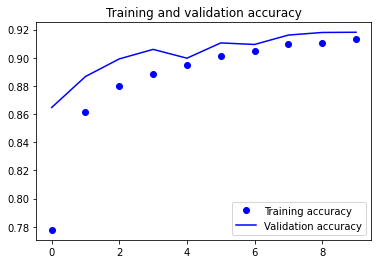

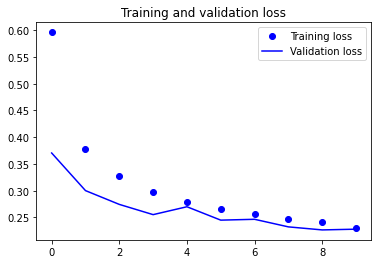

In [100]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [101]:
test_eval = fashion_model.evaluate(test_X, test_Y, verbose=1)


313/313 [==============================] - 3s 9ms/step - loss: 0.2416 - accuracy: 0.9108


In [102]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)